#### Jericho McLeod <br> CSI-873 Midterm

1) Design an artificial neural network with 1 hidden layer, 3 hidden units for handwritten digit recognition.<br>
2) Train your ANN on data below. Find parameters wij using the backpropagation algorithm. Implement the backpropagation algorithm yourself using your choice of language. Please comment your code.<br>
&nbsp;&nbsp;&nbsp;&nbsp;a) Use part of the training data for validation and a stopping criteria.<br>
&nbsp;&nbsp;&nbsp;&nbsp;b) What is the accuracy of the detection of the tested digits with the obtained $w_ij$? Estimate the confidence interval for the true error based on the testing data.<br>
3) Repeat (1) and (2) for 2 and 4 hidden units.<br>
4) Prepare a report on the results of your project. Share your observations. Include the code in the report together with instructions how to run it.

In [44]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [8]:
import matplotlib.pyplot as plt

def draw_neural_net(ax, left, right, bottom, top, layer_sizes):
    n_layers = len(layer_sizes)
    v_spacing = (top - bottom)/float(max(layer_sizes))
    h_spacing = (right - left)/float(len(layer_sizes) - 1)
    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing*(layer_size - 1)/2. + (top + bottom)/2.
        for m in range(layer_size):
            circle = plt.Circle((n*h_spacing + left, layer_top - m*v_spacing), v_spacing/4.,
                                color='w', ec='k', zorder=4)
            ax.add_artist(circle)
    # Edges
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
        layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                line = plt.Line2D([n*h_spacing + left, (n + 1)*h_spacing + left],
                                  [layer_top_a - m*v_spacing, layer_top_b - o*v_spacing], c='k')
                ax.add_artist(line)

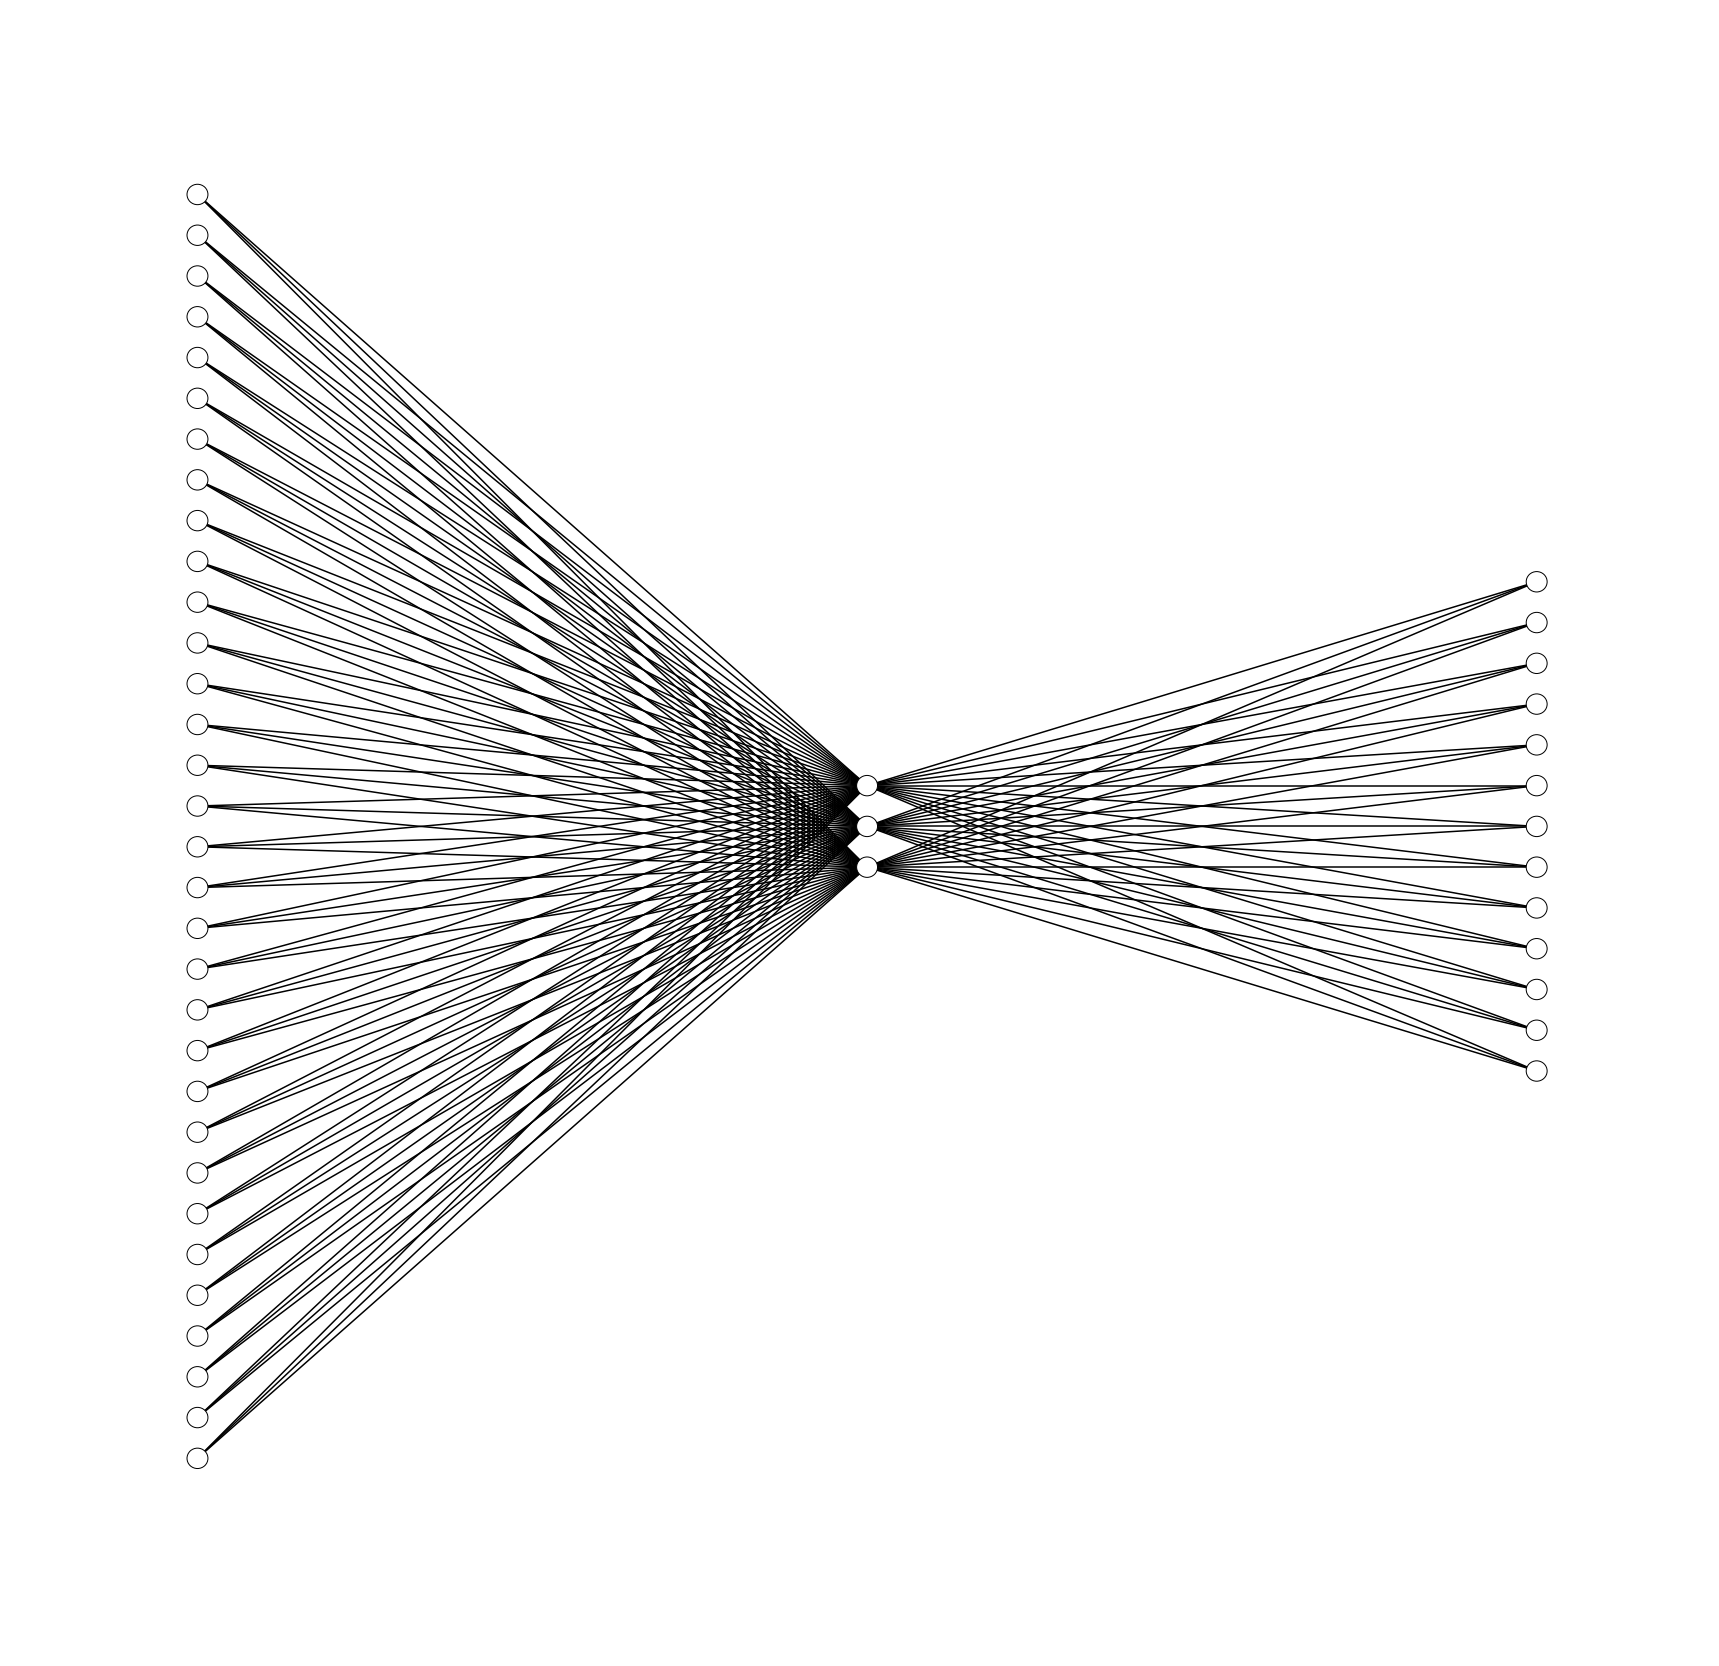

In [42]:
fig = plt.figure(figsize=(30, 30))
ax = fig.gca()
ax.axis('off')
draw_neural_net(ax, .1, .9, .1, .9, [32, 3, 13])
#fig.savefig('nn.png')

In [47]:
def data_import(file):
    data = []
    with open(file, 'r') as csvfile:
        csv_r = csv.reader(csvfile,delimiter=',')
        for row in csv_r:
            data.append(row)
    return(data)

file0 = 'train0.txt'
data0 = data_import(file0)
print(data0)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

